# Utils.py Function Guide

This notebook provides comprehensive documentation and examples for all functions in the `Utils.py` module. The module contains various utility functions for data science tasks including:
- Statistical analysis
- Data visualization
- Probability distributions (EMF/EDF)
- Machine learning helpers
- Confidence intervals
- Random number generation

In [1]:
# Import the Utils module and other necessary libraries
from Utils import *
import numpy as np
import matplotlib.pyplot as plt

## 1. `timeout` Decorator

**Purpose:** Adds a timeout to a function. If the function takes longer than the specified time, it raises a `TimeoutError`.

**Parameters:**
- `seconds` (int, default=10): Maximum time allowed for the function to execute
- `error_message` (str): Custom error message

**Note:** This decorator uses UNIX signals (SIGALRM) and only works on Unix-like systems (Linux, macOS), not Windows.

In [2]:
# Example: Function that completes within timeout
@timeout(seconds=2)
def quick_function():
    import time
    time.sleep(0.5)
    return "Completed successfully!"

result = quick_function()
print(result)

# Example: Function that would exceed timeout (commented out to prevent error)
# @timeout(seconds=1)
# def slow_function():
#     import time
#     time.sleep(3)
#     return "This won't complete"
# 
# slow_function()  # This would raise TimeoutError

Completed successfully!


## 2. `basic_stats` Function

**Purpose:** Prints basic statistical measures of a dataset including mean, standard deviation, skewness, and kurtosis.

**Parameters:**
- `data` (array-like): The dataset to analyze

**Outputs:** Prints formatted statistics to console

In [3]:
# Example with normal distribution
normal_data = np.random.normal(loc=50, scale=10, size=1000)
print("Normal distribution stats:")
basic_stats(normal_data)

# Example with skewed distribution
skewed_data = np.random.exponential(scale=2, size=1000)
print("\nExponential (right-skewed) distribution stats:")
basic_stats(skewed_data)

Normal distribution stats:
mean: 50.29	std: 9.78	skew: 0.01	kurtosis: 3.30

Exponential (right-skewed) distribution stats:
mean: 1.97	std: 2.03	skew: 2.40	kurtosis: 12.41


## 3. `showURL` Function

**Purpose:** Creates an IFrame to display a webpage inside a Jupyter notebook.

**Parameters:**
- `url` (str): The URL to display
- `ht` (int, default=600): Height of the IFrame in pixels

**Returns:** An IPython IFrame object

**Example:** (Commented out as it requires an active notebook environment)
```python
# Display a webpage in the notebook
# showURL('https://www.example.com', ht=400)
```

## 4. `load_sms` Function

**Purpose:** Loads the SMS spam dataset from a CSV file.

**Parameters:** None (expects file at `data/spam.csv`)

**Returns:** List of tuples `(text, label)` where label is 0 for ham (not spam) and 1 for spam

**Note:** This function expects a specific file structure with the spam.csv file in a data folder.

In [4]:
# Example (commented out as it requires the spam.csv file)
# sms_data = load_sms()
# print(f"Total messages: {len(sms_data)}")
# print(f"First message: {sms_data[0]}")
# 
# # Count spam vs ham
# spam_count = sum(1 for _, label in sms_data if label == 1)
# ham_count = sum(1 for _, label in sms_data if label == 0)
# print(f"Spam messages: {spam_count}, Ham messages: {ham_count}")

## 5. `discrete_histogram` Function

**Purpose:** Creates a bar plot for discrete data with proper spacing between bars.

**Parameters:**
- `data` (array-like): The discrete data to plot
- `normed` (bool, default=False): If True, normalizes counts to show relative frequencies
- `alpha` (float, default=1): Transparency level (0-1)
- `force_display` (bool, default=True): If True, calls plt.show() automatically

**Returns:** None (creates a matplotlib plot)

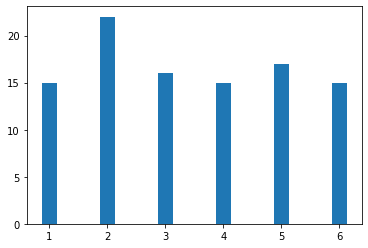

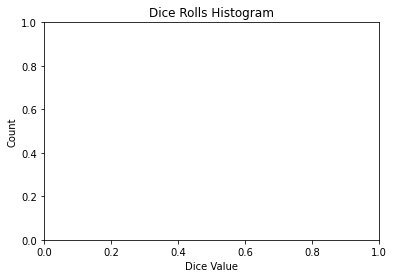

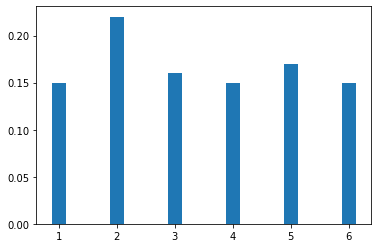

Text(0, 0.5, 'Relative Frequency')

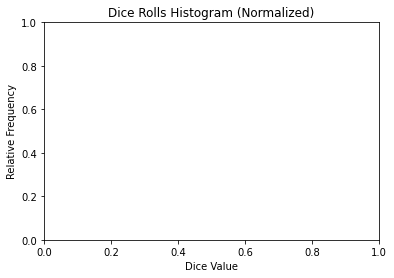

In [5]:
# Example with dice rolls
dice_rolls = np.random.randint(1, 7, size=100)
discrete_histogram(dice_rolls)
plt.title("Dice Rolls Histogram")
plt.xlabel("Dice Value")
plt.ylabel("Count")

# Example with normalized data
plt.figure()
discrete_histogram(dice_rolls, normed=True)
plt.title("Dice Rolls Histogram (Normalized)")
plt.xlabel("Dice Value")
plt.ylabel("Relative Frequency")

## 6. `makeFreq` Function

**Purpose:** Converts a data sequence into a frequency table showing unique values and their counts.

**Parameters:**
- `data_sequence` (iterable): The data to analyze

**Returns:** NumPy array with shape (n_unique, 2) where first column is unique values and second column is counts

In [6]:
# Example with simple data
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]
freq_table = makeFreq(data)
print("Frequency Table:")
print("Value | Count")
print("-" * 15)
for value, count in freq_table:
    print(f"{value:5.0f} | {count:5.0f}")

Frequency Table:
Value | Count
---------------
    1 |     1
    2 |     2
    3 |     3
    4 |     4


## 7. `makeEMF` Function

**Purpose:** Creates an Empirical Mass Function (EMF) - a probability distribution showing the relative frequency of each unique value.

**Parameters:**
- `data_sequence` (iterable): The data to analyze

**Returns:** NumPy array with shape (n_unique, 2) where first column is unique values and second column is relative frequencies (probabilities)

In [7]:
# Example: EMF of coin flips
coin_flips = np.random.choice([0, 1], size=100)  # 0=tails, 1=heads
emf = makeEMF(coin_flips)
print("Empirical Mass Function:")
print("Value | Probability")
print("-" * 20)
for value, prob in emf:
    label = "Tails" if value == 0 else "Heads"
    print(f"{label:5s} | {prob:.4f}")

Empirical Mass Function:
Value | Probability
--------------------
Tails | 0.4700
Heads | 0.5300


## 8. `plotEMF` Function

**Purpose:** Plots the Empirical Mass Function as a scatter plot with vertical lines (lollipop chart).

**Parameters:**
- `numRelFreqPairs` (array-like): EMF data with (value, probability) pairs
- `force_display` (bool, default=True): If True, calls plt.show() automatically

**Returns:** None (creates a matplotlib plot)

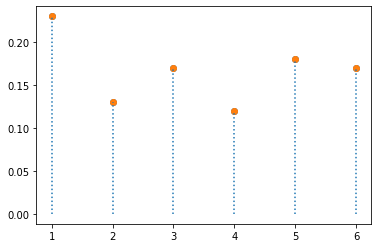

Text(0, 0.5, 'Probability')

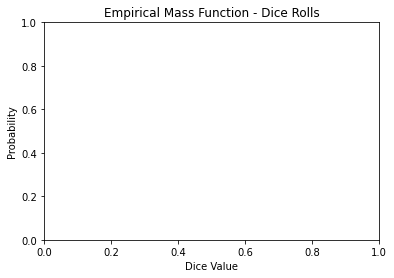

In [8]:
# Example: Plot EMF of dice rolls
dice_data = np.random.randint(1, 7, size=100)
emf_dice = makeEMF(dice_data)
plotEMF(emf_dice)
plt.title("Empirical Mass Function - Dice Rolls")
plt.xlabel("Dice Value")
plt.ylabel("Probability")

## 9. `makeEDF` Function

**Purpose:** Creates an Empirical Distribution Function (EDF) - the cumulative distribution function showing P(X ≤ x).

**Parameters:**
- `data_sequence` (iterable): The data to analyze

**Returns:** NumPy array with shape (n_unique, 2) where first column is unique values and second column is cumulative probabilities

In [9]:
# Example: Create EDF
data = [1, 2, 2, 3, 3, 3, 4, 5]
edf = makeEDF(data)
print("Empirical Distribution Function:")
print("Value | P(X ≤ value)")
print("-" * 25)
for value, cum_prob in edf:
    print(f"{value:5.0f} | {cum_prob:.4f}")

Empirical Distribution Function:
Value | P(X ≤ value)
-------------------------
    1 | 0.1250
    2 | 0.3750
    3 | 0.7500
    4 | 0.8750
    5 | 1.0000


## 10. `emfToEdf` Function

**Purpose:** Converts an Empirical Mass Function (EMF) to an Empirical Distribution Function (EDF).

**Parameters:**
- `emf` (array-like): EMF data with (value, probability) pairs

**Returns:** NumPy array with shape (n_unique, 2) containing (value, cumulative_probability) pairs

In [10]:
# Example: Convert EMF to EDF
emf = makeEMF([1, 1, 2, 2, 2, 3, 3, 3, 3])
print("EMF (Probability Mass):")
print(emf)
print("\nEDF (Cumulative Distribution):")
edf_converted = emfToEdf(emf)
print(edf_converted)

EMF (Probability Mass):
[[1.         0.22222222]
 [2.         0.33333333]
 [3.         0.44444444]]

EDF (Cumulative Distribution):
[[1.         0.22222222]
 [2.         0.55555556]
 [3.         1.        ]]


## 11. `plotEDF` Function

**Purpose:** Plots the Empirical Distribution Function as a step function with optional confidence bands.

**Parameters:**
- `edf` (array-like): EDF data with (value, cumulative_probability) pairs
- `force_display` (bool, default=True): If True, calls plt.show() automatically
- `points_at_jump` (bool, default=True): If True, shows dots at jump points
- `confidence_band` (bool, default=False): If True, shows DKW confidence band
- `alpha` (float, default=0.95): Confidence level for the band
- `color` (str, default='blue'): Color of the plot
- `title` (str): Plot title

**Returns:** None (creates a matplotlib plot)

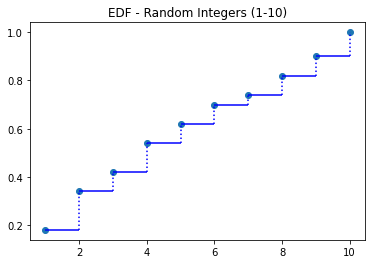

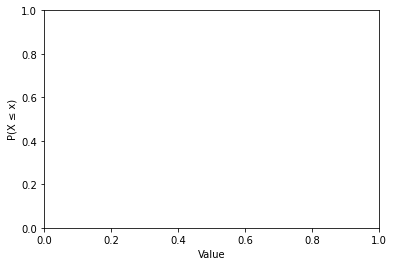

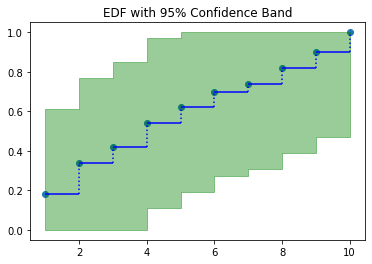

Text(0, 0.5, 'P(X ≤ x)')

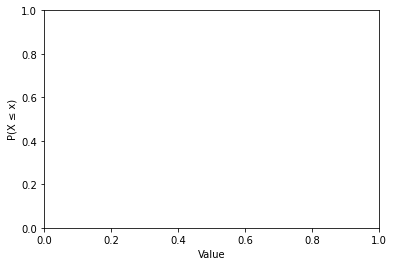

In [11]:
# Example: Plot EDF without confidence band
data = np.random.randint(1, 11, size=50)
edf = makeEDF(data)
plotEDF(edf, title="EDF - Random Integers (1-10)")
plt.xlabel("Value")
plt.ylabel("P(X ≤ x)")

# Example: Plot EDF with confidence band
plt.figure()
plotEDF(edf, confidence_band=True, alpha=0.95, 
        title="EDF with 95% Confidence Band")
plt.xlabel("Value")
plt.ylabel("P(X ≤ x)")

## 12. `linConGen` Function

**Purpose:** Generates pseudo-random numbers using a Linear Congruential Generator (LCG) algorithm.

**Parameters:**
- `m` (int): Modulus
- `a` (int): Multiplier
- `b` (int): Increment
- `x0` (int): Seed value
- `n` (int): Number of random numbers to generate

**Returns:** List of n pseudo-random integers modulo m

**Formula:** $X_{n+1} = (a \cdot X_n + b) \mod m$

In [12]:
# Example: Generate random numbers using LCG
# Using parameters from numerical recipes
m = 2**32
a = 1664525
b = 1013904223
x0 = 42  # seed
n = 10

random_numbers = linConGen(m, a, b, x0, n)
print(f"Generated {n} pseudo-random numbers:")
print(random_numbers)

# Convert to [0,1] range
normalized = [x / m for x in random_numbers]
print(f"\nNormalized to [0,1]:")
print(normalized)

Generated 10 pseudo-random numbers:
[42, 1083814273, 378494188, 2479403867, 955863294, 1613448261, 110225632, 1921058495, 508781842, 3753001289]

Normalized to [0,1]:
[9.778887033462524e-09, 0.2523451747838408, 0.08812504541128874, 0.5772811982315034, 0.22255426598712802, 0.37566019711084664, 0.02566390484571457, 0.4472812858875841, 0.1184600037522614, 0.8738137057516724]


## 13. `scatter3d` Function

**Purpose:** Creates a 3D scatter plot using Plotly for interactive visualization.

**Parameters:**
- `x, y, z` (array-like): Coordinates for the 3D points
- `c` (array-like, optional): Colors for the points
- `size` (float, default=2): Size of the markers
- `fig` (plotly.graph_objects.Figure, optional): Existing figure to add to

**Returns:** Plotly Figure object

In [13]:
# Example: Create a 3D scatter plot
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)
colors = x + y  # Color based on sum of x and y

fig = scatter3d(x, y, z, c=colors, size=5)
fig.update_layout(
    title="3D Scatter Plot Example",
    scene=dict(
        xaxis_title="X axis",
        yaxis_title="Y axis",
        zaxis_title="Z axis"
    )
)
fig.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## 14. `classification_report_interval` Function

**Purpose:** Generates a classification report with precision, recall, and accuracy metrics, including confidence intervals using Hoeffding's inequality.

**Parameters:**
- `y_true` (array-like): True labels
- `y_pred` (array-like): Predicted labels
- `labels` (list, optional): List of labels to include in the report
- `alpha` (float, default=0.01): Significance level for confidence intervals
- `union_bound_correction` (bool, default=True): Apply correction for multiple comparisons

**Returns:** String containing formatted classification report with confidence intervals

In [14]:
# Example: Classification report with confidence intervals
np.random.seed(42)
n_samples = 100

# Simulate binary classification
y_true = np.random.randint(0, 2, n_samples)
y_pred = y_true.copy()
# Add some errors
error_indices = np.random.choice(n_samples, size=20, replace=False)
y_pred[error_indices] = 1 - y_pred[error_indices]

report = classification_report_interval(
    y_true, y_pred, 
    labels=[0, 1], 
    alpha=0.05,
    union_bound_correction=True
)
print(report)

            labels           precision             recall

                 0  0.75 : [0.52,0.98] 0.82 : [0.57,1.00]
                 1  0.85 : [0.62,1.00] 0.79 : [0.57,1.00]

          accuracy                                        0.80 : [0.64,0.96]



## 15. `bennett_epsilon` Function

**Purpose:** Calculates epsilon for concentration inequalities using Bennett's inequality, which is tighter than Hoeffding when the variance is known.

**Parameters:**
- `n` (int): Number of samples
- `b` (float): Bound such that |X| ≤ b
- `sigma` (float): Standard deviation of X
- `alpha` (float): Significance level

**Returns:** Epsilon value such that P(|X - E[X]| ≥ epsilon) < alpha

**Mathematical Background:** Bennett's inequality provides tighter bounds than Hoeffding when variance information is available.

In [15]:
# Example: Calculate epsilon using Bennett's inequality
n = 100  # sample size
b = 1    # bounded by [-1, 1]
sigma = 0.3  # standard deviation
alpha = 0.05  # 95% confidence

epsilon_bennett = bennett_epsilon(n, b, sigma, alpha)
print(f"Bennett epsilon (tighter bound): {epsilon_bennett:.4f}")

Numerical error -1.8735013540549517e-16
Bennett epsilon (tighter bound): 0.0930


## 16. `epsilon_bounded` Function

**Purpose:** Calculates epsilon for concentration inequalities using Hoeffding's inequality for bounded random variables.

**Parameters:**
- `n` (int): Number of samples
- `b` (float): Bound such that |X| ≤ b
- `alpha` (float): Significance level

**Returns:** Epsilon value such that P(|X - E[X]| ≥ epsilon) < alpha

**Formula:** $\epsilon = b\sqrt{\frac{-\log(\alpha/2)}{2n}}$

In [16]:
# Example: Calculate epsilon using Hoeffding's inequality
n = 100  # sample size
b = 1    # bounded by [-1, 1]
alpha = 0.05  # 95% confidence

epsilon_hoeffding = epsilon_bounded(n, b, alpha)
print(f"Hoeffding epsilon (looser but general bound): {epsilon_hoeffding:.4f}")

# Compare with Bennett
epsilon_bennett_cmp = bennett_epsilon(n, b, 0.3, alpha)
print(f"\nComparison:")
print(f"Bennett (with σ=0.3): {epsilon_bennett_cmp:.4f}")
print(f"Hoeffding (no σ needed): {epsilon_hoeffding:.4f}")
print(f"Bennett is {epsilon_hoeffding/epsilon_bennett_cmp:.2f}x tighter when variance is known")

Hoeffding epsilon (looser but general bound): 0.1358
Numerical error -1.8735013540549517e-16

Comparison:
Bennett (with σ=0.3): 0.0930
Hoeffding (no σ needed): 0.1358
Bennett is 1.46x tighter when variance is known


## 17. `compute_confidence_interval_bounded` Function

**Purpose:** Computes a confidence interval for the mean of bounded data using Hoeffding's inequality.

**Parameters:**
- `data` (array-like): The data sample
- `delta` (float): Significance level (1 - confidence level)
- `min_value` (float, optional): Minimum possible value (for clipping)
- `max_value` (float, optional): Maximum possible value (for clipping)

**Returns:** Tuple (lower_bound, upper_bound) representing the confidence interval

In [17]:
# Example: Compute confidence interval for bounded data
# Generate data in [0, 1]
data = np.random.beta(2, 5, size=50)  # Beta distribution in [0, 1]

# 95% confidence interval
ci = compute_confidence_interval_bounded(data, delta=0.05, 
                                         min_value=0, max_value=1)
print(f"Sample mean: {np.mean(data):.4f}")
print(f"95% Confidence Interval: [{ci[0]:.4f}, {ci[1]:.4f}]")
print(f"Interval width: {ci[1] - ci[0]:.4f}")

Sample mean: 0.2772
95% Confidence Interval: [0.0852, 0.4693]
Interval width: 0.3841


## 18. `print_confidence_interval` Function

**Purpose:** Prints a confidence interval in a formatted way.

**Parameters:**
- `point_estimate` (float): The center of the interval (e.g., sample mean)
- `epsilon` (float): The half-width of the interval
- `min_value` (float, optional): Minimum value to clip the lower bound
- `max_value` (float, optional): Maximum value to clip the upper bound

**Returns:** None (prints to console)

In [18]:
# Example: Print confidence intervals
point_est = 0.75
epsilon = 0.15

print("Without clipping:")
print_confidence_interval(point_est, epsilon)

print("\nWith clipping to [0, 1]:")
print_confidence_interval(point_est, epsilon, min_value=0, max_value=1)

Without clipping:
[0.60,0.90]

With clipping to [0, 1]:
[0.60,0.90]


## 19. `train_test_validation` Function

**Purpose:** Splits data into training, testing, and validation sets - essential for proper model evaluation to avoid overfitting.

**Parameters:**
- `X` (array-like): Feature matrix with shape (n_samples, n_features)
- `Y` (array-like): Target labels with shape (n_samples,)
- `test_size` (float, default=0.2): Proportion of data for testing
- `validation_size` (float, default=0.2): Proportion of data for validation
- `random_state` (int, optional): Random seed for reproducibility
- `shuffle` (bool, default=True): Whether to shuffle data before splitting

**Returns:** Tuple of (X_train, X_test, X_valid, Y_train, Y_test, Y_valid)

**Use Case:** Training set for learning, validation set for hyperparameter tuning, test set for final evaluation.

In [19]:
# Example: Split data into train/test/validation
from sklearn.datasets import make_classification

# Generate synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=15, n_redundant=5, 
                           random_state=42)

# Split the data
X_train, X_test, X_valid, y_train, y_test, y_valid = train_test_validation(
    X, y, 
    test_size=0.2, 
    validation_size=0.2, 
    random_state=42
)

print(f"Original data shape: {X.shape}")
print(f"Training set: {X_train.shape} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape} ({len(X_test)/len(X)*100:.1f}%)")
print(f"Validation set: {X_valid.shape} ({len(X_valid)/len(X)*100:.1f}%)")
print(f"\nTotal samples: {len(X_train) + len(X_test) + len(X_valid)}")

Original data shape: (1000, 20)
Training set: (600, 20) (60.0%)
Test set: (200, 20) (20.0%)
Validation set: (200, 20) (20.0%)

Total samples: 1000


## Summary

This notebook has documented all 19 main functions in the `Utils.py` module:

### Statistical Functions
- `basic_stats`: Calculate mean, std, skewness, kurtosis
- `makeFreq`, `makeEMF`, `makeEDF`: Create frequency and probability distributions
- `emfToEdf`: Convert mass to distribution functions

### Visualization Functions
- `discrete_histogram`: Plot discrete data histograms
- `plotEMF`, `plotEDF`: Plot probability distributions
- `scatter3d`: Interactive 3D scatter plots
- `showURL`: Display webpages in notebooks

### Machine Learning & Evaluation
- `classification_report_interval`: Classification metrics with confidence intervals
- `train_test_validation`: Split data for proper model evaluation

### Confidence Intervals & Statistical Inference
- `bennett_epsilon`: Tight bounds using Bennett's inequality
- `epsilon_bounded`: Bounds using Hoeffding's inequality
- `compute_confidence_interval_bounded`: Compute confidence intervals
- `print_confidence_interval`: Display confidence intervals

### Utilities
- `timeout`: Add timeouts to functions
- `load_sms`: Load SMS spam dataset
- `linConGen`: Linear congruential random number generator

Each function includes detailed documentation and working examples to help you understand and use them effectively!